In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


###### Data description:
###### W = Wins
###### R =  Runs scored
###### AB =  At bat
###### H = Hit
###### 2B =  Double
###### 3B =  Triple
###### HR =  Home runs
###### BB = Base on balls 
###### SO = Strikeouts
###### SB = Stolen Bases
###### RA = Runs Allowed
###### ER = Earned Runs
###### ERA = Earned Run Average (ERA)
###### CG =  Complete game
###### SHO  = Shutouts
###### SV = Saves
###### E = Errors

###### Problem statement :- There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. Our target variable (Label) is   numbers of wins. Rest all the columns are features.

In [18]:
### Checking size of our dataset.
data.shape

(30, 17)

###### Our dataset contain 30 rows and 17 columns.

In [19]:
### Checking for null values in our dataset.
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

###### There are no null values persent in our dataset.

In [20]:
### Checking data information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


###### As we can see all the entires are having Integer data. also there is no null values. we only have Floats and Interger.

In [21]:
### Let's check data description.
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


###### Data looks fine for all the columns, The differnce betwen Mean and std is good for all the columns. Difference between Min, Max and Quartiles are seems fine.

## Exploratory Data Analysis (EDA)

##### (i) Univeriate Analysis.

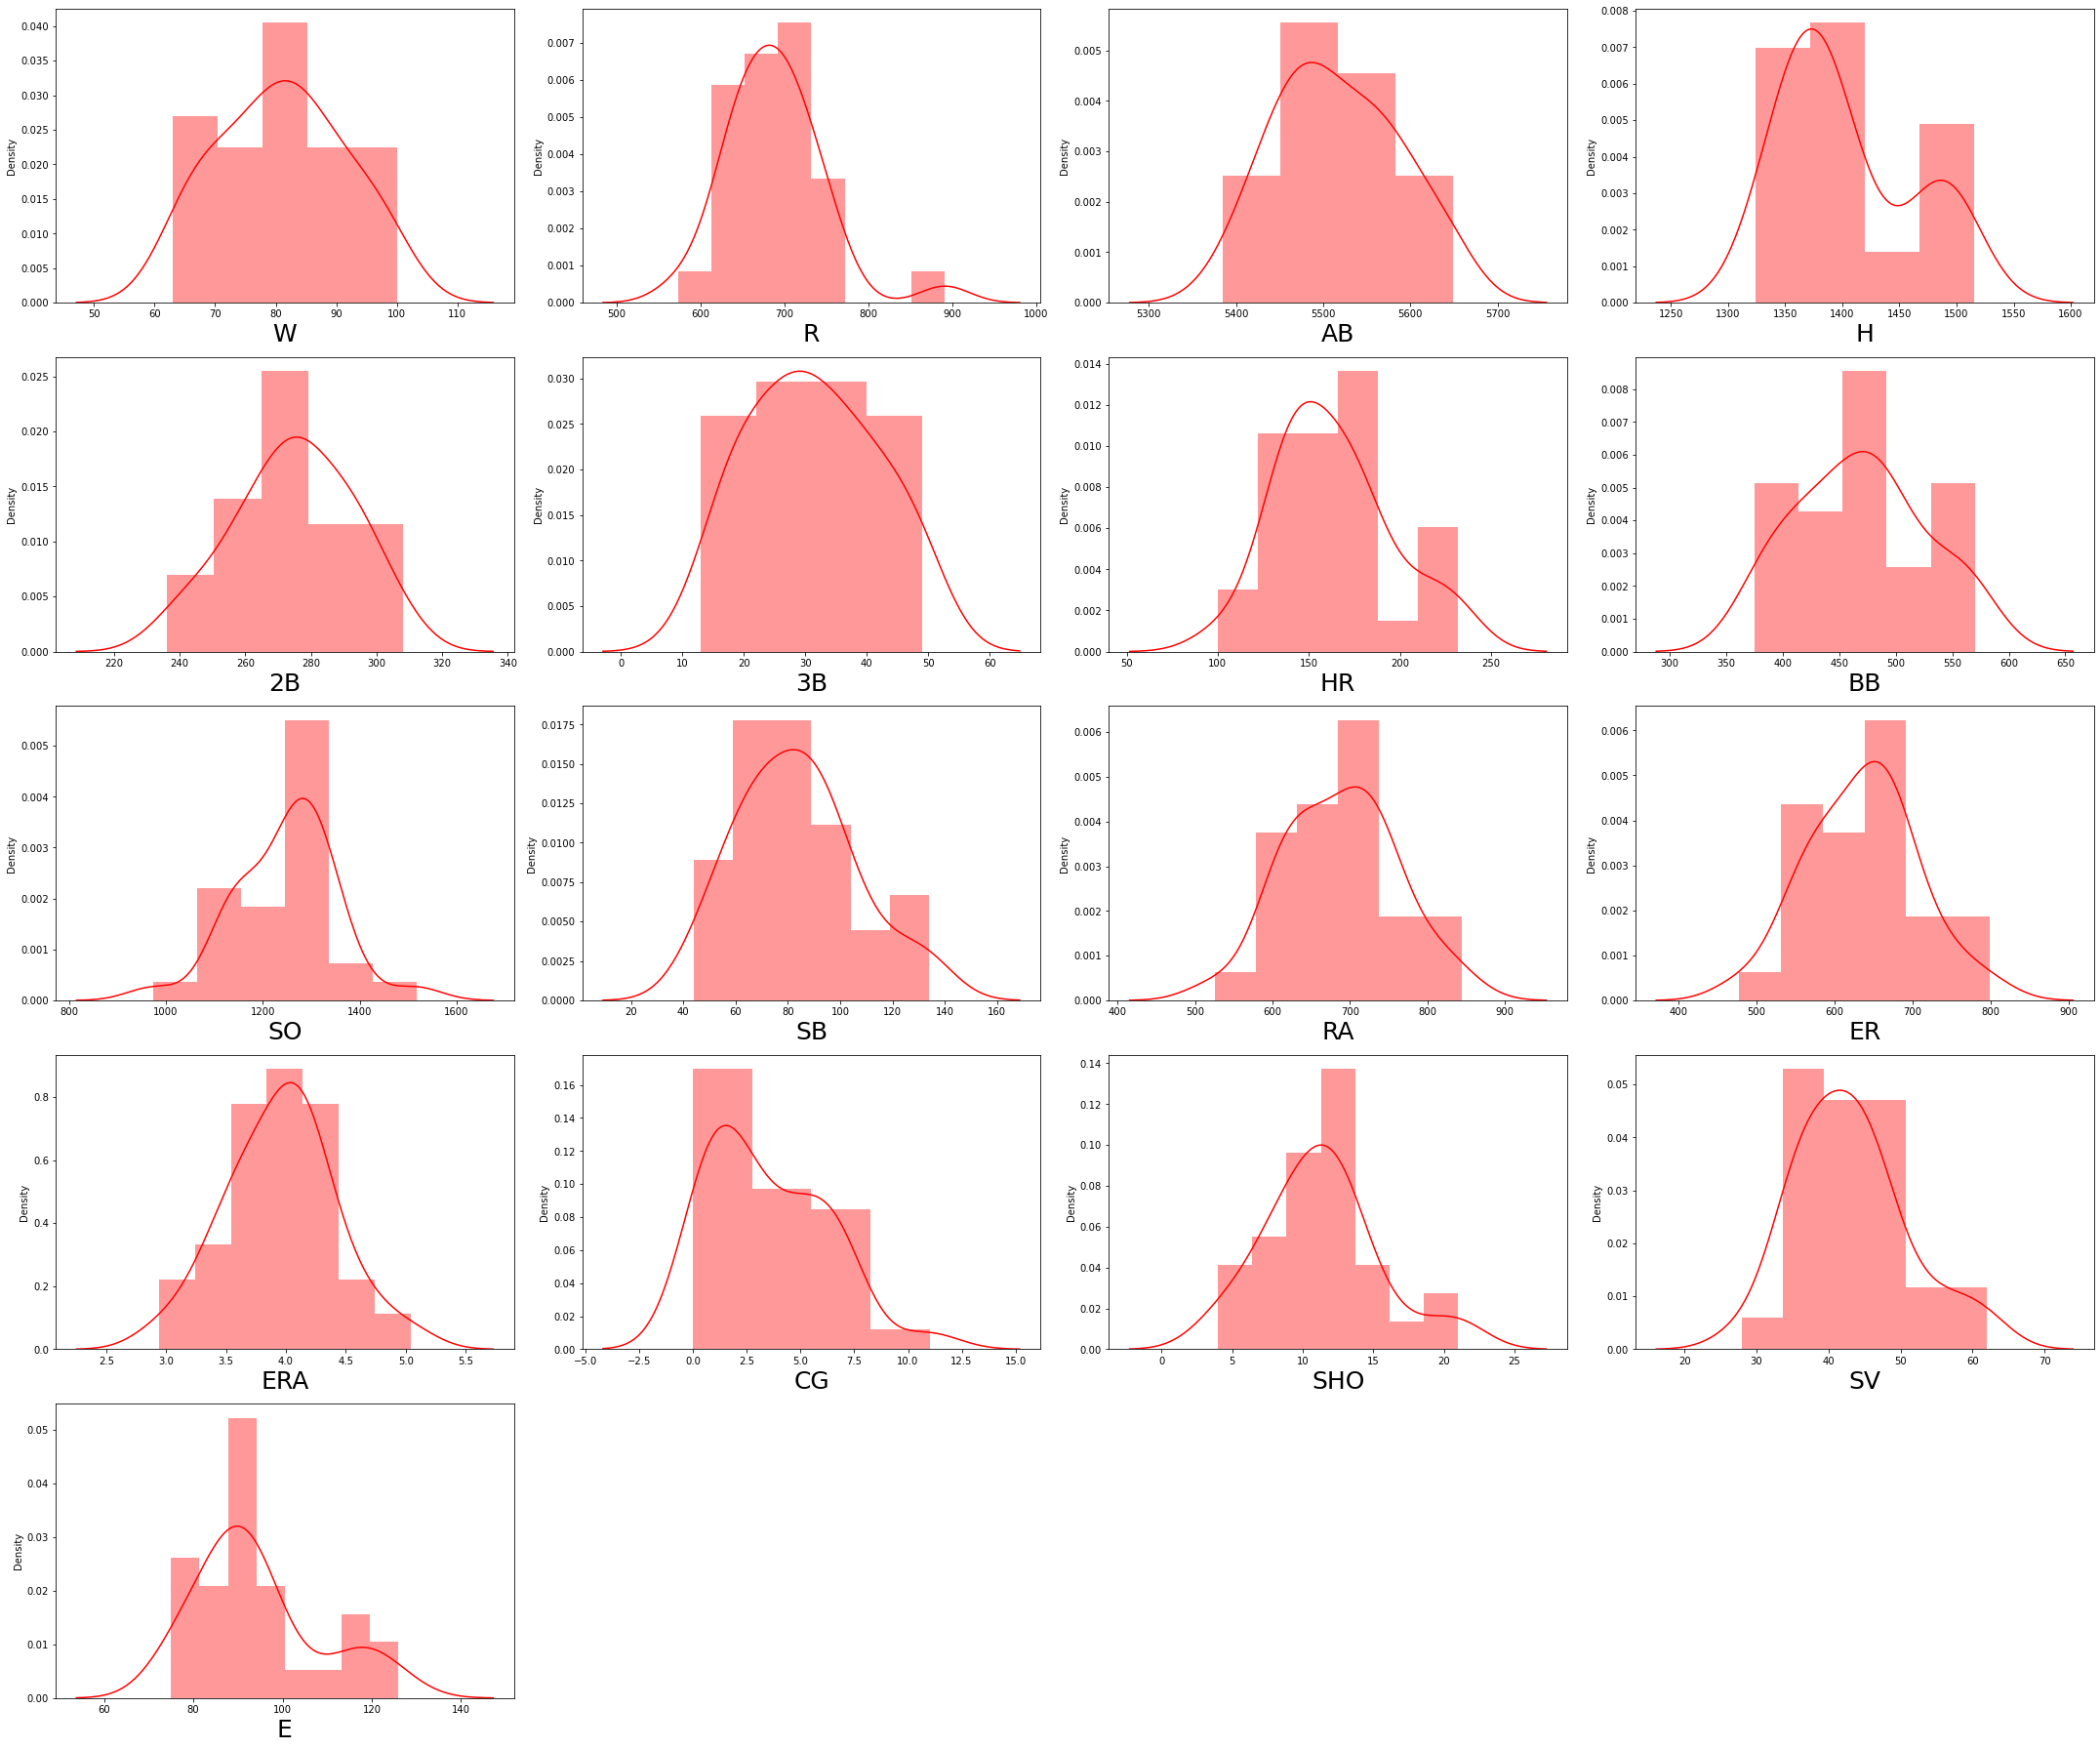

In [15]:
### Let's check data destribution first.
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[column],color='r')
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

###### W(wins) this is our Label and the data distribution is normal. There seems to be one outlier in R (runs). Also shows some Right skewness in Error column, Rest all the data is looking Noramally distribution.

In [22]:
### Checking skewnnes score in data set.
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

###### In Run scored column (R) skewness is high the data is right skewed.
###### Also Columns H, CG, SHO, SV, & E shows moderate right skewwness score, which is ok.

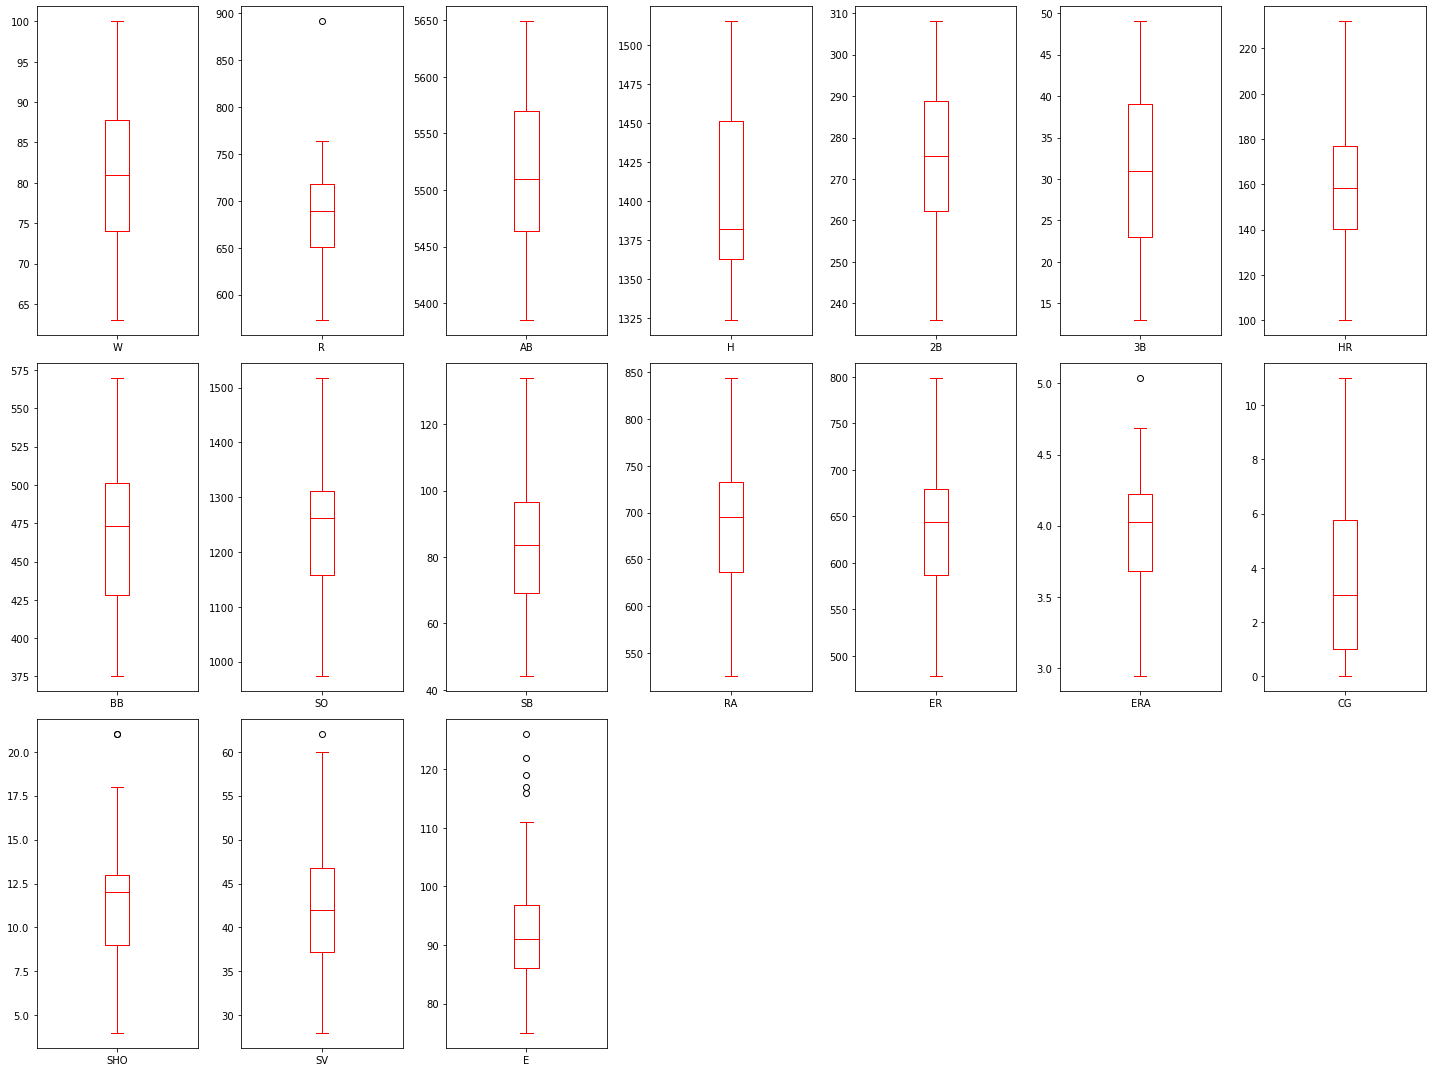

In [47]:
### Ploting box plot to check for outliers.
plt.figure(figsize=(20,15), facecolor='white')
count = 1
for column in data:
    if count<=17:
        ax = plt.subplot(3,7,count)
        data[column].plot(kind = 'box',color ='r')
    count +=1
plt.tight_layout()

###### From above boxplot we can see that our dataset has 1 outlier in R, ERA, SHO and SV columns.
###### And in Error(E) column we have more then 4 outilers. We need to work on it.

##### (ii)Biveriate Analysis

<AxesSubplot:xlabel='R', ylabel='W'>

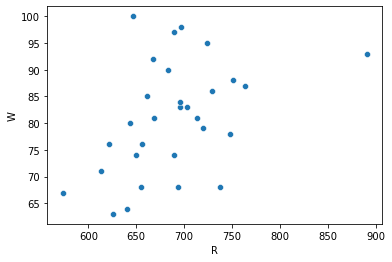

In [4]:
sns.scatterplot(x = data['R'], y=data['W'])

##### As runs increases changes of wins are also increases.

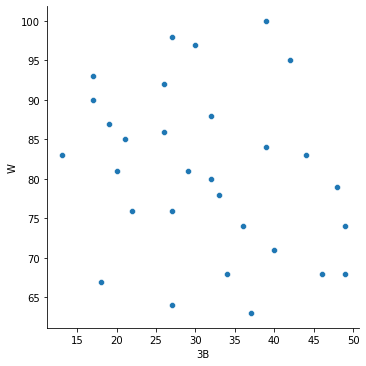

In [5]:
### Lets plot graph between wins  and 3B(triple)
sns.relplot(x = '3B', y = 'W', data=data)

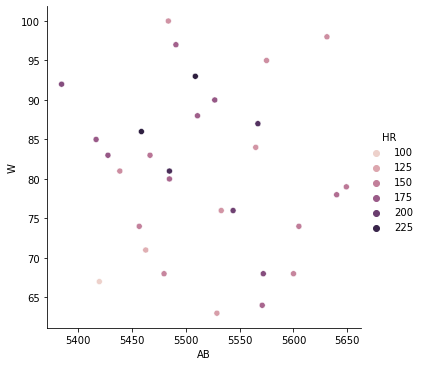

In [8]:
sns.relplot(x = 'AB', y = 'W', hue = 'HR',data=data)

##### This will show At bat balls which goes to home run and wins.

### (iii) Multiveriate anaylsis

<AxesSubplot:>

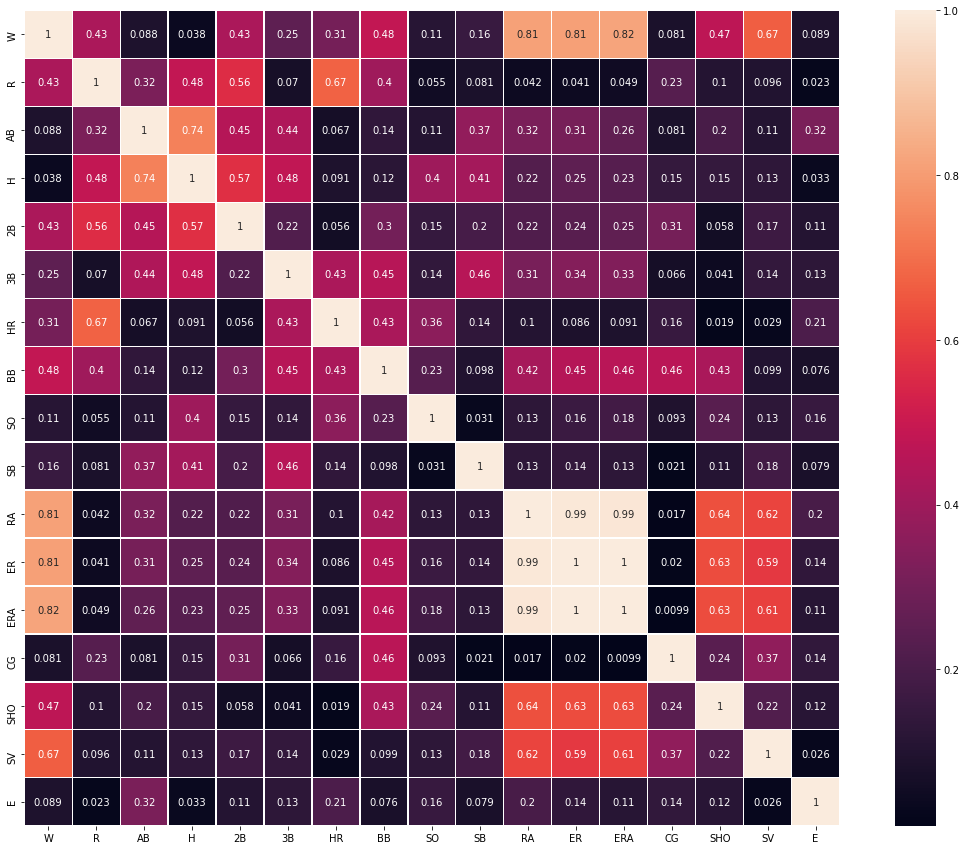

In [12]:
### Ploting heatmap to check correlationship.
data_corr = data.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(data_corr,annot=True, square=True, linewidths=0.2)

###### as we can see from above heatmap ERA, ER, RA shows max relationship with our dataset.
###### also we can see that RA shows 99% correlationship with ER and ERA. need to take any action.

<AxesSubplot:title={'center':'Correlation with Wins'}>

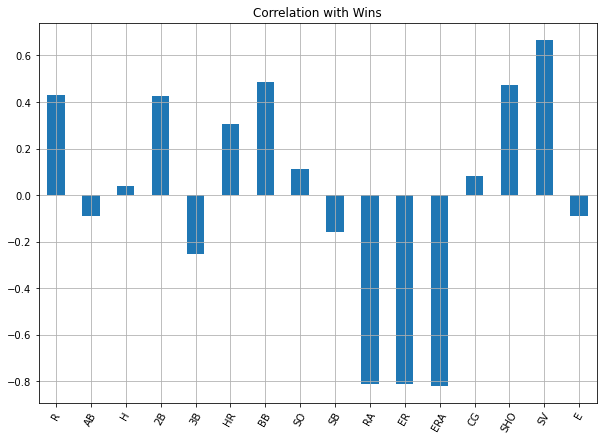

In [14]:
### let's calculate the featues Correlation values with our target variable.
data.drop('W',axis=1).corrwith(data.W).plot(kind = 'bar', grid = True, figsize=(10,7),rot = 60,title = 'Correlation with Wins')

###### From the above bar plot we can see that H, AB, SO,SB,CG and E shows less relationship with our target variable.
###### Whereas RA, ER, ERA SHO, and SV showing high correlationship with our Target variable Wins.

### Pre_Processing.
##### Let's remove outlier first from our dataset.

In [15]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [16]:
from scipy.stats import zscore
z = np.abs(zscore(data[['R','ER','SHO','SV','E']]))
filter_entry = (z<3).all(axis = 1)
df = data[filter_entry]

In [17]:
df.shape

(29, 17)

In [19]:
data_loss = ((30-29)/30)*100
print(data_loss,' Only this much data loss is there after applying zscore which is ok')

3.3333333333333335  Only this much data loss is there after applying zscore which is ok


In [20]:
### Let's check for skewness again.
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

###### Still we can see there is moderate skewness in features  E, SV, CG and H but we can consider it.

In [21]:
### Spliting our data set.
x = df.drop('W',axis=1)
y =df['W']

### Scaling / Standardization

In [22]:
### scaling our x data using Standardscaler.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(x)

###### scaling our X data so that our model will not get baised.

### Train - test split

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=43)

In [36]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(23, 16) (23,) (6, 16) (6,)


### Importing Regression models

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [38]:
lr = LinearRegression() ### Instantiating Linear regression.
lr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_lr_pred =lr.predict(x_test) ### Predicting x_test using Linear regression model.

In [39]:
dtr = DecisionTreeRegressor() ### Instantiating DecisionTree Regressor 
dtr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_dtr_pred = dtr.predict(x_test) ### Predicting x_test using DecisionTree model.

In [40]:
knn = KNeighborsRegressor() ### Instantiating KNeighbors Regressor
knn.fit(x_train,y_train) ### Training our model with x_train and y_train
y_knn_pred = knn.predict(x_test) ### Predicting x_test using Kneighbors model.

In [41]:
svr = SVR()             ### Instantiating SVR
svr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_svr_pred = svr.predict(x_test) ### Predicting x_test using SVM model.

In [42]:
rfr = RandomForestRegressor() ### Instantiating RandomForest Regressor
rfr.fit(x_train,y_train)     ### Training our model with x_train and y_train
y_rfr_pred = rfr.predict(x_test) ### Predicting x_test using Random Forest  model.

### Evaluation Metrics and R2_score for each model

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R2 score for Linear regression:- ',r2_score(y_test,y_lr_pred))
print('R2 score for Decision Tree:- ',r2_score(y_test,y_dtr_pred))
print('R2 score for KNeighbors:- ',r2_score(y_test,y_knn_pred))
print('R2 score for SVR:- ',r2_score(y_test,y_svr_pred))
print('R2 score for Random Forest:- ',r2_score(y_test,y_rfr_pred))

R2 score for Linear regression:-  -1.6579669952555265
R2 score for Decision Tree:-  -1.201202843083652
R2 score for KNeighbors:-  0.6849425915800983
R2 score for SVR:-  0.017464122284088446
R2 score for Random Forest:-  0.19975188627665452


In [45]:
### Checking MSE error.

print('MSE for Linear regression:- ',mean_squared_error(y_test,y_lr_pred))
print('MSE for Decision Tree:- ',mean_squared_error(y_test,y_dtr_pred))
print('MSE for KNeighbors:- ',mean_squared_error(y_test,y_knn_pred))
print('MSE for SVR:- ',mean_squared_error(y_test,y_svr_pred))
print('MSE for Random Forest:- ',mean_squared_error(y_test,y_rfr_pred))

MSE for Linear regression:-  135.03948984228774
MSE for Decision Tree:-  111.83333333333333
MSE for KNeighbors:-  16.006666666666675
MSE for SVR:-  49.91828112062229
MSE for Random Forest:-  40.65704999999998


###### We can see that r2_score is high for Kneighbour as compare to other models. Also MSE value is also less 16.0 which is less then other models.

##### Let's choose Knn model for hyper parameter tuning.

### performing Hyper Parameter tuning.

In [47]:
from sklearn.model_selection import GridSearchCV ### Importing GridSearchCV for parameter tuning.

In [50]:
params = {'n_neighbors':np.arange(2,20,2),
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size':np.arange(10,100,5),
         'p':np.arange(2,10,2)}

In [51]:
grid_search = GridSearchCV(estimator=knn, param_grid=params,cv = 5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95]),
                         'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'p': array([2, 4, 6, 8])})

In [52]:
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 6, 'p': 2}

In [53]:
knn_final = KNeighborsRegressor(algorithm='auto', leaf_size= 10,n_neighbors= 6 )

In [54]:
knn_final.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=10, n_neighbors=6)

In [55]:
y_predict = knn_final.predict(x_test)

In [56]:
r2_score(y_test,y_predict)

0.5694368507381085

##### After applying hyperperameter tuning on our Knn model, the r2_score is 56% which is less then default Knn model 68%. Hence we will go with Default model.

### Saving our model

In [57]:
import pickle
Baseball = 'Baseball.pickle'
pickle.dump(knn,open(Baseball,'wb'))

In [58]:
load_model = pickle.load(open(Baseball,'rb'))

In [59]:
y_predict = load_model.predict(x_test)

In [61]:
r2_score(y_test,y_predict)

0.6849425915800983